# Task 1: Introduction

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [6]:
X = np.array([[70, 3],
              [50, 1],
              [120, 9],
              [100, 2]])

In [7]:
y = np.array([21200, 22010, 24305, 31500])


In [8]:
m = X.shape[0] 

In [9]:
n = X.shape[1]  

# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [10]:
W = np.zeros(n)
b = 0.0          

In [11]:
learning_rate = 0.00001   

# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [22]:
def forward_pass(X, W, b):
    return np.dot(X, W) + b   # y_hat


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [18]:
def compute_loss(y, y_hat):
    return (1/(2*m)) * np.sum((y_hat - y) ** 2)


# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [19]:
def compute_gradients(X, y, y_hat):
    db = (1/m) * np.sum(y_hat - y)
    dW = (1/m) * np.dot(X.T, (y_hat - y))
    return dW, db

# Task 7: Update Parameters

In [20]:
def update_parameters(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b


# Task 8: Training Loop

In [21]:
epochs = 10000
losses = []

In [23]:
def forward_pass(X, W, b):
    return np.dot(X, W) + b   # y_hat


for i in range(epochs):
    # Forward pass
    y_hat = forward_pass(X, W, b)
    
    # Compute loss
    loss = compute_loss(y, y_hat)
    losses.append(loss)
    
    # Backward pass (gradients)
    dW, db = compute_gradients(X, y, y_hat)
    
    # Update parameters
    W, b = update_parameters(W, b, dW, db, learning_rate)
    
    # Print every 1000 steps
    if i % 1000 == 0:
        print(f"Epoch {i}: Loss = {loss:.2f}, W = {W}, b = {b:.2f}")


Epoch 0: Loss = 314607890.62, W = [21.62775    0.9183875], b = 0.25
Epoch 1000: Loss = 18964844.67, W = [ 277.2461227  -113.07029477], b = 19.08
Epoch 2000: Loss = 17502127.13, W = [ 282.88212542 -232.83959717], b = 34.78
Epoch 3000: Loss = 16181335.86, W = [ 288.23198531 -346.60582479], b = 50.03
Epoch 4000: Loss = 14988656.19, W = [ 293.30998873 -454.66864553], b = 64.86
Epoch 5000: Loss = 13911618.17, W = [ 298.12970886 -557.31276896], b = 79.29
Epoch 6000: Loss = 12938965.68, W = [ 302.7040414  -654.80869294], b = 93.34
Epoch 7000: Loss = 12060538.30, W = [ 307.04523831 -747.41341303], b = 107.02
Epoch 8000: Loss = 11267164.63, W = [ 311.16494    -835.37109648], b = 120.36
Epoch 9000: Loss = 10550566.03, W = [ 315.0742058  -918.91372259], b = 133.37


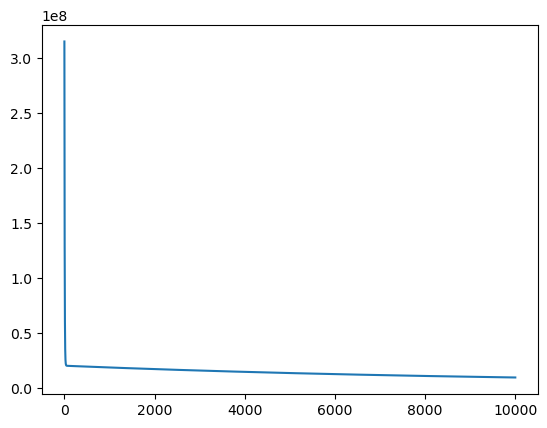

In [24]:
plt.plot(losses)

Text(0.5, 0, 'Epochs')

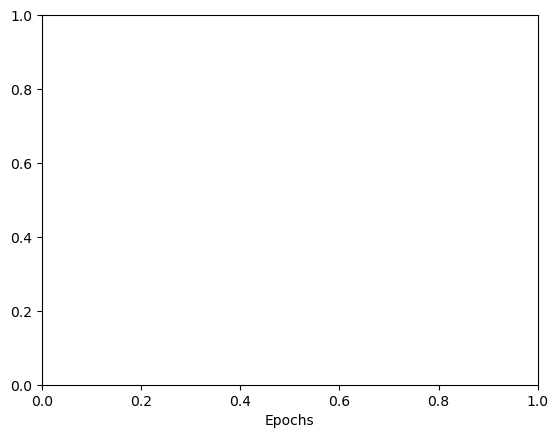

In [25]:
plt.xlabel("Epochs")

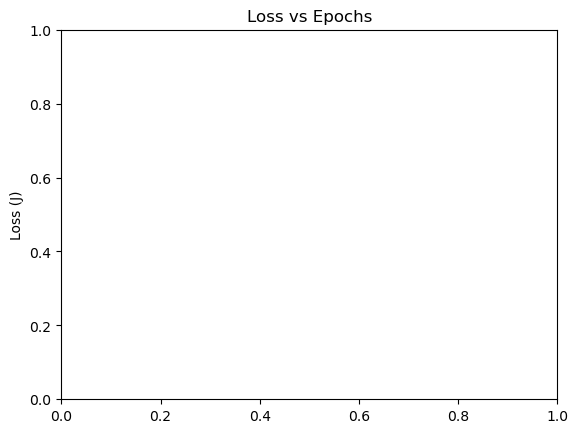

In [26]:
plt.ylabel("Loss (J)")
plt.title("Loss vs Epochs")
plt.show()

# Task 9: Predictions

In [27]:
print("\nFinal Weights:", W)
print("Final Bias:", b)


Final Weights: [ 318.77993017 -998.18436773]
Final Bias: 146.05003412547092


In [28]:
x_new = np.array([80, 4])
y_pred = np.dot(x_new, W) + b

In [29]:
print(f"Predicted Price for Area=80, Distance=4: {y_pred:.2f}")

Predicted Price for Area=80, Distance=4: 21655.71
